In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/cesurdagli/Desktop/Capstone Project/Feb17NoNull_Merged.csv')
print(df.shape)
df.head()

(10257, 53)


,Unnamed: 0,email,pass_fail,right_question,wrong_question,testID,testTakenTime,testDuration,testLevel,taskCompleted,...,reason,reasonOther,level,ave_quality_Satisfaction,ave_authenticProblems,ave_ALT,ave_activation,ave_demonstration,ave_application,ave_integration
0,0,kmh6185@hotmail.com,FAIL,7.0,3.0,3.244575e+16,1.520088e+09,9.0,UG,5.0,...,assignment,NaN,confident,4.00,5.000000,4.50,5.000000,5.0,5.000000,5.000000
1,2,cyxggq1995@sjtu.edu.cn,FAIL,8.0,2.0,1.195546e+23,1.520092e+09,36.4,GR,1.0,...,assignment,NaN,confident,3.75,2.666667,3.00,2.666667,3.4,3.666667,3.333333
2,3,jiaxincao@sjtu.edu.cn,PASS,9.0,1.0,1.278873e+20,1.520093e+09,32.7,GR,5.0,...,assignment,NaN,confident,4.75,4.000000,4.25,4.333333,4.0,4.333333,4.000000
3,5,taha91_1@hotmail.com,FAIL,8.0,2.0,1.231130e+23,1.520100e+09,22.6,GR,5.0,...,assignment,NaN,some,4.50,4.333333,3.50,5.000000,4.2,4.666667,4.000000
4,6,zaely.sanchez@upr.edu,FAIL,8.0,2.0,3.478776e+19,1.520101e+09,8.7,UG,5.0,...,assignment,NaN,confident,4.00,4.000000,4.00,4.000000,3.8,4.333333,4.000000


In [3]:
# Recoding the categorical values

df['pass_fail1']=df['pass_fail'].map({'PASS':1, 'FAIL':0})

clean_nums = {'highestEd': {'DD':5, 'MD':4, 'BD':3, 'HS':2, 'AD':1, 'OT':0},
                  'reason': {'review':4, 'learn':3, 'assignment':2, 'curious':1, 'other':0},
                  'level': {'confident':2, 'some':1, 'little':0},
             'testLevel': {'GR':1, 'UG':0}}
df.replace(clean_nums, inplace=True)
df[['highestEd', 'reason', 'level']].head()

#replacing empty values with null values
df=df.replace(r'^\s+$', np.nan, regex=True)

#Dropping the null values
df=df[df['reason'].notnull() & df['highestEd'].notnull() & df['level'].notnull()]

In [6]:
print(df.shape)
print(df.pass_fail1.value_counts())
print(df.testLevel.value_counts())

(9579, 54)
0    7400
1    2179
Name: pass_fail1, dtype: int64
0    6827
1    2752
Name: testLevel, dtype: int64


# Logistic Regression

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import average_precision_score


# Define the features
X=df[['testLevel', 'highestEd', 'reason','level', 'quality_Satisfaction1', 'authenticProblems1',
       'demonstration1', 'application1', 'activation1', 'ALT2', 'ALT3',
       'quality_Satisfaction2', 'demonstration2', 'demonstration3', 'ALT4',
       'authenticProblems2', 'integration1', 'activation2',
       'authenticProblems3', 'integration2', 'application3', 'integration3',
       'activation3', 'application4', 'demonstration5',
       'ALT1Reversed', 'demonstration4Reversed',
       'quality_Satisfaction3Reversed', 'quality_Satisfaction4Reversed']]

print("X: ", type(X), X.shape)

# Define the target
y = df.pass_fail1
print("y: ", type(y), y.shape)
print("df.pass_fail shape: ", df.pass_fail1.shape)

# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y, random_state=5)

print("\n")
print(type(Xlr), Xlr.shape, len(Xlr)) #TrainX

print("\n")
print(type(Xtestlr), Xtestlr.shape, len(Xtestlr)) #TestX

print("\n")
print(type(ylr), ylr.shape, len(ylr)) #Trainy

print("\n")
print(type(ytestlr), ytestlr.shape, len(ytestlr)) #Testy

X:  <class 'pandas.core.frame.DataFrame'> (9579, 29)
y:  <class 'pandas.core.series.Series'> (9579,)
df.pass_fail shape:  (9579,)


<class 'pandas.core.frame.DataFrame'> (7184, 29) 7184


<class 'pandas.core.frame.DataFrame'> (2395, 29) 2395


<class 'pandas.core.series.Series'> (7184,) 7184


<class 'pandas.core.series.Series'> (2395,) 2395


In [9]:
from sklearn.metrics import roc_auc_score  


# Construct the LogisticRegression model
clf = LogisticRegression().fit(Xlr, ylr) 

# Fit the model on the training data.
#clf.fit(Xlr, ylr) 


# Printout the training score
y_predict_training = clf.predict(Xlr)
print("\n")
print("[Training] Accuracy score: (ylr, y_predict_training)",accuracy_score(ylr, y_predict_training))

# Print the accuracy from the testing data.

y_predict_test = clf.predict(Xtestlr)
print("\n")
print("[Test] Accuracy score (y_predict_test, ytestlr):",accuracy_score(y_predict_test, ytestlr))


print("\n")
print('Confusion Matrix:')

cnf_matrix = metrics.confusion_matrix(ytestlr, y_predict_test)
print(cnf_matrix)
print('')
print("[Test Classification Report:]")
print(classification_report(ytestlr, y_predict_test))

print("\n")

probs=clf.predict_proba(Xtestlr)[:, 1]
auc = roc_auc_score(ytestlr, probs)  
print('AUC: %.2f' % auc)  
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_score(ytestlr, y_predict_test)))



[Training] Accuracy score: (ylr, y_predict_training) 0.7700445434298441


[Test] Accuracy score (y_predict_test, ytestlr): 0.7803757828810021


Confusion Matrix:
[[1852   16]
 [ 510   17]]

[Test Classification Report:]
              precision    recall  f1-score   support

           0       0.78      0.99      0.88      1868
           1       0.52      0.03      0.06       527

    accuracy                           0.78      2395
   macro avg       0.65      0.51      0.47      2395
weighted avg       0.72      0.78      0.70      2395



AUC: 0.65
Average precision-recall score: 0.23


/Users/cesurdagli/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Resampling techniques — Undersample majority class
using from imblearn.under_sampling import RandomUnderSampler

In [7]:
from imblearn.under_sampling import RandomUnderSampler 
from collections import Counter


rus = RandomUnderSampler(random_state=5)
X_rus, y_rus = rus.fit_resample(Xlr, ylr)
print('Resampled dataset shape %s' % Counter(y_rus))
print("\n")
downsampled = LogisticRegression().fit(X_rus, y_rus)
downsampled_pred = downsampled.predict(Xtestlr)    

print("Accuracy:",metrics.accuracy_score(ytestlr, downsampled_pred))
print("Precision:",metrics.precision_score(ytestlr, downsampled_pred))
print("Recall:",metrics.recall_score(ytestlr, downsampled_pred))
print("F1 Score:",metrics.f1_score(ytestlr, downsampled_pred))
print("\n")
print('Confusion Matrix:')
cnf_matrix = metrics.confusion_matrix(ytestlr, downsampled_pred)
print(cnf_matrix)
print("\n")
print("[Test Classification Report:]")
print(classification_report(ytestlr, downsampled_pred))

print("\n")
probs=downsampled.predict_proba(Xtestlr)[:, 1]
auc = roc_auc_score(ytestlr, probs)  
print('AUC: %.2f' % auc)  

score=downsampled.predict_proba(Xtestlr)[:,-1]
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_score(ytestlr, score)))

/Users/cesurdagli/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


Resampled dataset shape Counter({0: 1652, 1: 1652})


Accuracy: 0.5883089770354906
Precision: 0.296
Recall: 0.6318785578747628
F1 Score: 0.40314769975786924


Confusion Matrix:
[[1076  792]
 [ 194  333]]


[Test Classification Report:]
              precision    recall  f1-score   support

           0       0.85      0.58      0.69      1868
           1       0.30      0.63      0.40       527

    accuracy                           0.59      2395
   macro avg       0.57      0.60      0.54      2395
weighted avg       0.73      0.59      0.62      2395



AUC: 0.65
Average precision-recall score: 0.33


/Users/cesurdagli/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#  Oversample Minority class
using from imblearn.under_sampling import RandomOverSampler

In [8]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=5)
X_ros, y_ros = ros.fit_resample(Xlr, ylr)
print('Resampled dataset shape %s' % Counter(y_ros))
print("\n")
upsampled = LogisticRegression().fit(X_ros, y_ros)
upsampled_pred = upsampled.predict(Xtestlr)    

print("Accuracy:",metrics.accuracy_score(ytestlr, upsampled_pred))
print("Precision:",metrics.precision_score(ytestlr, upsampled_pred))
print("Recall:",metrics.recall_score(ytestlr, upsampled_pred))
print("F1 Score:",metrics.f1_score(ytestlr, upsampled_pred))
print("\n")
print('Confusion Matrix:')
cnf_matrix = metrics.confusion_matrix(ytestlr, upsampled_pred)
print(cnf_matrix)
print("\n")
print("[Test Classification Report:]")
print(classification_report(ytestlr, upsampled_pred))
print("\n")
probs=upsampled.predict_proba(Xtestlr)[:, 1]
auc = roc_auc_score(ytestlr, probs)  
print('AUC: %.2f' % auc)  
score1=upsampled.predict_proba(Xtestlr)[:,-1]
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_score(ytestlr, score1)))

Resampled dataset shape Counter({1: 5532, 0: 5532})


Accuracy: 0.6041753653444677
Precision: 0.3056325023084026
Recall: 0.6280834914611005
F1 Score: 0.41118012422360245


Confusion Matrix:
[[1116  752]
 [ 196  331]]


[Test Classification Report:]
              precision    recall  f1-score   support

           0       0.85      0.60      0.70      1868
           1       0.31      0.63      0.41       527

    accuracy                           0.60      2395
   macro avg       0.58      0.61      0.56      2395
weighted avg       0.73      0.60      0.64      2395



AUC: 0.65
Average precision-recall score: 0.34


/Users/cesurdagli/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# SMOTE Generate synthetic samples


In [9]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=5, ratio=1.0)
SX_train, Sy_train = sm.fit_sample(Xlr, ylr)
print('Resampled dataset shape %s' % Counter(Sy_train))
print("\n")
smote = LogisticRegression().fit(SX_train, Sy_train)
smote_pred = smote.predict(Xtestlr)
    
print("Accuracy:",metrics.accuracy_score(ytestlr, smote_pred))
print("Precision:",metrics.precision_score(ytestlr, smote_pred))
print("Recall:",metrics.recall_score(ytestlr, smote_pred))
print("F1 Score:",metrics.f1_score(ytestlr, smote_pred))
print("\n")
print("Confusion Matrix")
cnf_matrix = metrics.confusion_matrix(ytestlr, smote_pred)
print(cnf_matrix)
print("\n")
print("[Test Classification Report:]")
print(classification_report(ytestlr, smote_pred))

score2=smote.predict_proba(Xtestlr)[:,-1]
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_score(ytestlr, score2)))

Resampled dataset shape Counter({1: 5532, 0: 5532})


Accuracy: 0.5962421711899791
Precision: 0.3010849909584087
Recall: 0.6318785578747628
F1 Score: 0.4078383343539498


Confusion Matrix
[[1095  773]
 [ 194  333]]


[Test Classification Report:]
              precision    recall  f1-score   support

           0       0.85      0.59      0.69      1868
           1       0.30      0.63      0.41       527

    accuracy                           0.60      2395
   macro avg       0.58      0.61      0.55      2395
weighted avg       0.73      0.60      0.63      2395

Average precision-recall score: 0.33


/Users/cesurdagli/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# ADASYN

In [12]:
from imblearn.over_sampling import ADASYN

ad = ADASYN(random_state=5)
AX_train, Ay_train = ad.fit_sample(Xlr, ylr)
print('Resampled dataset shape %s' % Counter(Ay_train))
print("\n")
adasyn = LogisticRegression().fit(AX_train, Ay_train)
adasyn_pred = adasyn.predict(Xtestlr)
    
print("Accuracy:",metrics.accuracy_score(ytestlr, adasyn_pred))
print("Precision:",metrics.precision_score(ytestlr, adasyn_pred))
print("Recall:",metrics.recall_score(ytestlr, adasyn_pred))
print("F1 Score:",metrics.f1_score(ytestlr, adasyn_pred))
print("\n")
print("Confusion Matrix")
cnf_matrix = metrics.confusion_matrix(ytestlr, adasyn_pred)
print(cnf_matrix)
print("\n")
print("[Test Classification Report:]")
print(classification_report(ytestlr, adasyn_pred))
print("\n")
score3= adasyn.predict_proba(Xtestlr)[:,-1]
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_score(ytestlr, score3)))

Resampled dataset shape Counter({1: 5622, 0: 5532})


Accuracy: 0.5820459290187892
Precision: 0.2970890410958904
Recall: 0.6584440227703985
F1 Score: 0.4094395280235988


Confusion Matrix
[[1047  821]
 [ 180  347]]


[Test Classification Report:]
              precision    recall  f1-score   support

           0       0.85      0.56      0.68      1868
           1       0.30      0.66      0.41       527

    accuracy                           0.58      2395
   macro avg       0.58      0.61      0.54      2395
weighted avg       0.73      0.58      0.62      2395



Average precision-recall score: 0.34


/Users/cesurdagli/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Random Forest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier

# train model
rf = RandomForestClassifier(random_state=5).fit(Xlr, ylr)

# Predict on test set
rf_pred = rf.predict(Xtestlr)
print("\n")
print("Accuracy:",metrics.accuracy_score(ytestlr, rf_pred))
print("Precision:",metrics.precision_score(ytestlr, rf_pred))
print("Recall:",metrics.recall_score(ytestlr, rf_pred))
print("F1 Score:",metrics.f1_score(ytestlr, rf_pred))

cnf_matrix = metrics.confusion_matrix(ytestlr, rf_pred)
print("\n")
print("Confusion Matrix")
cnf_matrix = metrics.confusion_matrix(ytestlr, rf_pred)
print(cnf_matrix)
print("\n")
print("[Test Classification Report:]")
print(classification_report(ytestlr, rf_pred))

print("\n")
probs=rf.predict_proba(Xtestlr)[:, 1]
auc = roc_auc_score(ytestlr, probs)  
print('AUC: %.2f' % auc)  
score4= rf.predict_proba(Xtestlr)[:,1]
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_score(ytestlr, score4)))


y_score_rf = rf.predict_proba(X_test)[:,-1]
average_precision = average_precision_score(y_test, y_score_rf)
print('Average precision-recall score RF: {}'.format(average_precision))



Accuracy: 0.748643006263048
Precision: 0.2670807453416149
Recall: 0.08159392789373814
F1 Score: 0.12499999999999999


Confusion Matrix
[[1750  118]
 [ 484   43]]


[Test Classification Report:]
              precision    recall  f1-score   support

           0       0.78      0.94      0.85      1868
           1       0.27      0.08      0.12       527

    accuracy                           0.75      2395
   macro avg       0.53      0.51      0.49      2395
weighted avg       0.67      0.75      0.69      2395



AUC: 0.60
Average precision-recall score: 0.27


/Users/cesurdagli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


NameError: name 'X_test' is not defined

# Balanced Random Forest
BalancedRandomForestClassifier is another ensemble method in which each tree of the forest will be provided a balanced bootstrap sample [1CLB2004]. This class provides all functionality of the sklearn.ensemble.RandomForestClassifier and notably the feature_importances_ attributes:

In [17]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
brf = BalancedRandomForestClassifier(random_state=5)
brf.fit(Xlr, ylr) 
brf_pred = brf.predict(Xtestlr)
print(balanced_accuracy_score(ytestlr, brf_pred))  
print("\n")
print(brf.feature_importances_)
print("\n")
#X_brf, y_brf = brf.fit_sample(Xlr, ylr)
#print('Resampled dataset shape %s' % Counter(y_brf))
print(np.bincount(brf_pred))
print("\n")
print("Accuracy:",metrics.accuracy_score(ytestlr, brf_pred))
print("Precision:",metrics.precision_score(ytestlr, brf_pred))
print("Recall:",metrics.recall_score(ytestlr, brf_pred))
print("F1 Score:",metrics.f1_score(ytestlr, brf_pred))

cnf_matrix = metrics.confusion_matrix(ytestlr, brf_pred)
print("\n")
print("Confusion Matrix")
cnf_matrix = metrics.confusion_matrix(ytestlr, brf_pred)
print(cnf_matrix)
print("\n")
print("[Test Classification Report:]")
print(classification_report(ytestlr, brf_pred))

score6= brf.predict_proba(Xtestlr)[:,-1]
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_score(ytestlr, score6)))

/Users/cesurdagli/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


0.6138464054544936


[0.02008802 0.05949009 0.00659357 0.03012981 0.03463267 0.05894415
 0.02900527 0.03489198 0.03358582 0.03325171 0.04860236 0.03346074
 0.040709   0.02170138 0.04517967 0.02747559 0.02489916 0.02442705
 0.03004863 0.03155311 0.02626599 0.02588226 0.03004615 0.02622051
 0.04368027 0.05398667 0.04073687 0.04575339 0.0387581 ]


[1207 1188]


Accuracy: 0.5803757828810021
Precision: 0.2988215488215488
Recall: 0.6736242884250474
F1 Score: 0.41399416909620984


Confusion Matrix
[[1035  833]
 [ 172  355]]


[Test Classification Report:]
              precision    recall  f1-score   support

           0       0.86      0.55      0.67      1868
           1       0.30      0.67      0.41       527

    accuracy                           0.58      2395
   macro avg       0.58      0.61      0.54      2395
weighted avg       0.73      0.58      0.62      2395

Average precision-recall score: 0.33


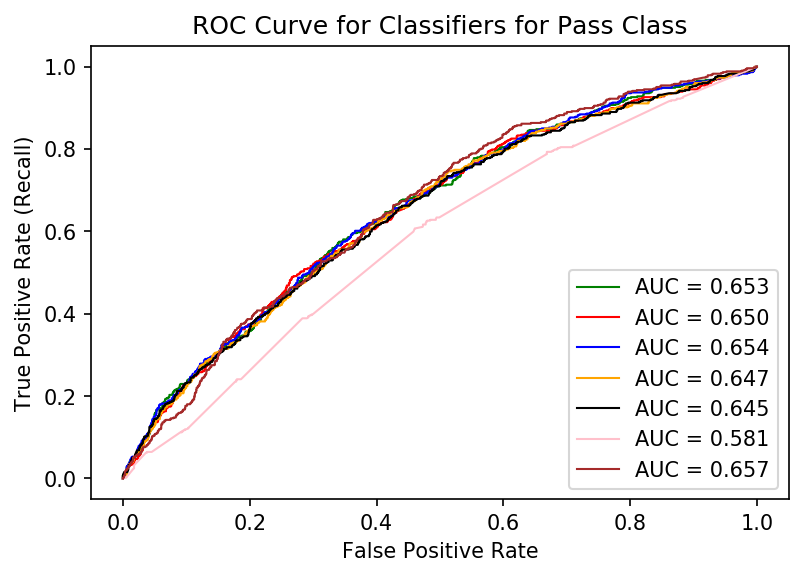

In [23]:
import matplotlib.pyplot as plt

probas = clf.predict_proba(Xtestlr)
probas1 = downsampled.predict_proba(Xtestlr)
probas2 = upsampled.predict_proba(Xtestlr)
probas3 = smote.predict_proba(Xtestlr)
probas4 = adasyn.predict_proba(Xtestlr)
probas5 = rf.predict_proba(Xtestlr)
probas6 = brf.predict_proba(Xtestlr)


# get false and true positive rates
fpr, tpr, thresholds = roc_curve(ytestlr, probas[:,1], pos_label=1)
fpr1, tpr1, thresholds1 = roc_curve(ytestlr, probas1[:,1], pos_label=1)
fpr2, tpr2, thresholds2 = roc_curve(ytestlr, probas2[:,1], pos_label=1)
fpr3, tpr3, thresholds3 = roc_curve(ytestlr, probas3[:,1], pos_label=1)
fpr4, tpr4, thresholds4 = roc_curve(ytestlr, probas4[:,1], pos_label=1)
fpr5, tpr5, thresholds5 = roc_curve(ytestlr, probas5[:,1], pos_label=1)
fpr6, tpr6, thresholds6 = roc_curve(ytestlr, probas6[:,1], pos_label=1)
# get area under the curve
roc_auc = auc(fpr, tpr)
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)
roc_auc4 = auc(fpr4, tpr4)
roc_auc5 = auc(fpr5, tpr5)
roc_auc6 = auc(fpr6, tpr6)

# PLOT ROC curve
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.plot(fpr1, tpr1, lw=1, color='red', label=f'AUC = {roc_auc1:.3f}')
plt.plot(fpr2, tpr2, lw=1, color='blue', label=f'AUC = {roc_auc2:.3f}')
plt.plot(fpr3, tpr3, lw=1, color='orange', label=f'AUC = {roc_auc3:.3f}')
plt.plot(fpr4, tpr4, lw=1, color='black', label=f'AUC = {roc_auc4:.3f}')
plt.plot(fpr5, tpr5, lw=1, color='pink', label=f'AUC = {roc_auc5:.3f}')
plt.plot(fpr6, tpr6, lw=1, color='brown', label=f'AUC = {roc_auc6:.3f}')
plt.title('ROC Curve for Classifiers for Pass Class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

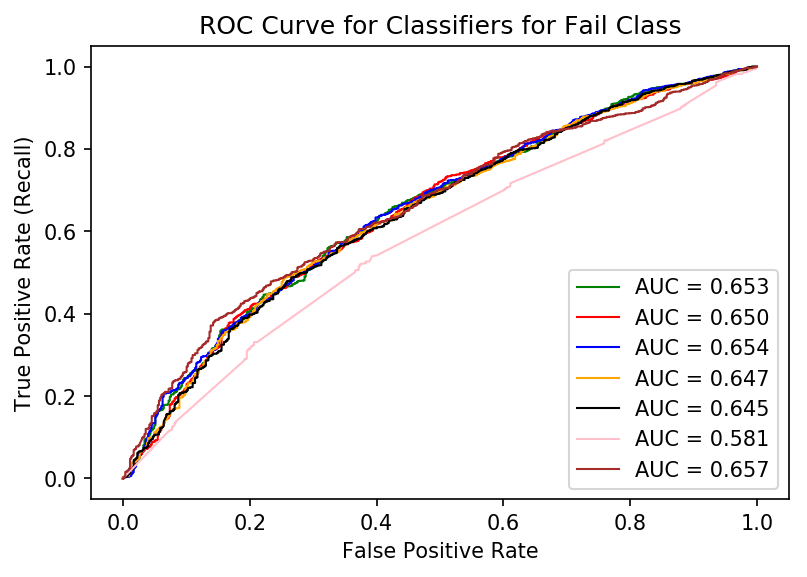

In [24]:
probas = clf.predict_proba(Xtestlr)
probas1 = downsampled.predict_proba(Xtestlr)
probas2 = upsampled.predict_proba(Xtestlr)
probas3 = smote.predict_proba(Xtestlr)
probas4 = adasyn.predict_proba(Xtestlr)
probas5 = rf.predict_proba(Xtestlr)
probas6 = brf.predict_proba(Xtestlr)


# get false and true positive rates
fpr, tpr, thresholds = roc_curve(ytestlr, probas[:,0], pos_label=0)
fpr1, tpr1, thresholds1 = roc_curve(ytestlr, probas1[:,0], pos_label=0)
fpr2, tpr2, thresholds2 = roc_curve(ytestlr, probas2[:,0], pos_label=0)
fpr3, tpr3, thresholds3 = roc_curve(ytestlr, probas3[:,0], pos_label=0)
fpr4, tpr4, thresholds4 = roc_curve(ytestlr, probas4[:,0], pos_label=0)
fpr5, tpr5, thresholds5 = roc_curve(ytestlr, probas5[:,0], pos_label=0)
fpr6, tpr6, thresholds6 = roc_curve(ytestlr, probas6[:,0], pos_label=0)
# get area under the curve
roc_auc = auc(fpr, tpr)
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)
roc_auc4 = auc(fpr4, tpr4)
roc_auc5 = auc(fpr5, tpr5)
roc_auc6 = auc(fpr6, tpr6)

# PLOT ROC curve
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.plot(fpr1, tpr1, lw=1, color='red', label=f'AUC = {roc_auc1:.3f}')
plt.plot(fpr2, tpr2, lw=1, color='blue', label=f'AUC = {roc_auc2:.3f}')
plt.plot(fpr3, tpr3, lw=1, color='orange', label=f'AUC = {roc_auc3:.3f}')
plt.plot(fpr4, tpr4, lw=1, color='black', label=f'AUC = {roc_auc4:.3f}')
plt.plot(fpr5, tpr5, lw=1, color='pink', label=f'AUC = {roc_auc5:.3f}')
plt.plot(fpr6, tpr6, lw=1, color='brown', label=f'AUC = {roc_auc6:.3f}')
plt.title('ROC Curve for Classifiers for Fail Class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

# Random Forest Classifier with Parameter Tunig

/Users/cesurdagli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/cesurdagli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/cesurdagli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/cesurdagli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/cesurdagli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465:

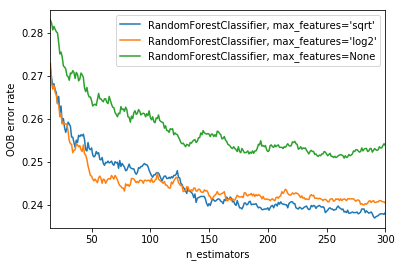

In [25]:
import matplotlib.pyplot as plt
from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 5


# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 300

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(Xlr, ylr)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [27]:
from sklearn.ensemble import RandomForestClassifier

# train model
rf = RandomForestClassifier(random_state=5, max_features="sqrt", n_estimators=290).fit(Xlr, ylr)

# Predict on test set
rf_pred = rf.predict(Xtestlr)
print("\n")
print("Accuracy:",metrics.accuracy_score(ytestlr, rf_pred))
print("Precision:",metrics.precision_score(ytestlr, rf_pred))
print("Recall:",metrics.recall_score(ytestlr, rf_pred))
print("F1 Score:",metrics.f1_score(ytestlr, rf_pred))

cnf_matrix = metrics.confusion_matrix(ytestlr, rf_pred)
print("\n")
print("Confusion Matrix")
cnf_matrix = metrics.confusion_matrix(ytestlr, rf_pred)
print(cnf_matrix)
print("\n")
print("[Test Classification Report:]")
print(classification_report(ytestlr, rf_pred))



Accuracy: 0.7670146137787056
Precision: 0.30864197530864196
Recall: 0.04743833017077799
F1 Score: 0.08223684210526316


Confusion Matrix
[[1812   56]
 [ 502   25]]


[Test Classification Report:]
              precision    recall  f1-score   support

           0       0.78      0.97      0.87      1868
           1       0.31      0.05      0.08       527

    accuracy                           0.77      2395
   macro avg       0.55      0.51      0.47      2395
weighted avg       0.68      0.77      0.69      2395



/Users/cesurdagli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/cesurdagli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/cesurdagli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/cesurdagli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/cesurdagli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: 

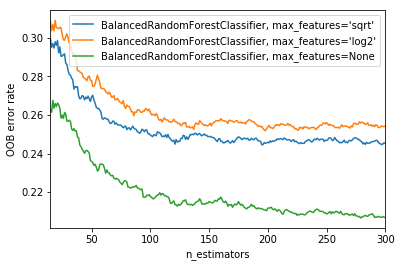

In [29]:
import matplotlib.pyplot as plt
from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 5


# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    ("BalancedRandomForestClassifier, max_features='sqrt'",
        BalancedRandomForestClassifier(n_estimators=100,
                               warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("BalancedRandomForestClassifier, max_features='log2'",
        BalancedRandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("BalancedRandomForestClassifier, max_features=None",
        BalancedRandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 300

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(Xlr, ylr)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [31]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
brf = BalancedRandomForestClassifier(random_state=5, max_features=None, n_estimators=300)
brf.fit(Xlr, ylr) 
brf_pred = brf.predict(Xtestlr)
print(balanced_accuracy_score(ytestlr, brf_pred))  
print("\n")
print(brf.feature_importances_)
print("\n")
#X_brf, y_brf = brf.fit_sample(Xlr, ylr)
#print('Resampled dataset shape %s' % Counter(y_brf))
print(np.bincount(brf_pred))
print("\n")
print("Accuracy:",metrics.accuracy_score(ytestlr, brf_pred))
print("Precision:",metrics.precision_score(ytestlr, brf_pred))
print("Recall:",metrics.recall_score(ytestlr, brf_pred))
print("F1 Score:",metrics.f1_score(ytestlr, brf_pred))

cnf_matrix = metrics.confusion_matrix(ytestlr, brf_pred)
print("\n")
print("Confusion Matrix")
cnf_matrix = metrics.confusion_matrix(ytestlr, brf_pred)
print(cnf_matrix)
print("\n")
print("[Test Classification Report:]")
print(classification_report(ytestlr, brf_pred))
print("\n")
score=brf.predict_proba(Xtestlr)[:,-1]
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_score(ytestlr, score)))

0.6173499343786696


[0.0204009  0.06670106 0.00649679 0.03551453 0.03414949 0.05301861
 0.02981339 0.03531176 0.03278493 0.03294613 0.05214249 0.03465057
 0.04056313 0.01712848 0.04739927 0.02429003 0.02324171 0.02425741
 0.02517551 0.02983034 0.0245002  0.02489384 0.03057103 0.0237994
 0.04458767 0.05993668 0.03989389 0.04713671 0.03886402]


[1211 1184]


Accuracy: 0.5837160751565762
Precision: 0.3015202702702703
Recall: 0.6774193548387096
F1 Score: 0.4172998246639392


Confusion Matrix
[[1041  827]
 [ 170  357]]


[Test Classification Report:]
              precision    recall  f1-score   support

           0       0.86      0.56      0.68      1868
           1       0.30      0.68      0.42       527

    accuracy                           0.58      2395
   macro avg       0.58      0.62      0.55      2395
weighted avg       0.74      0.58      0.62      2395



Average precision-recall score: 0.31


# SMOTE & Random Forest

In [16]:
sm = SMOTE(random_state=5, ratio=1.0)
SX_train, Sy_train = sm.fit_sample(Xlr, ylr)
print('Resampled dataset shape %s' % Counter(Sy_train))
print("\n")
# train model
rf = RandomForestClassifier(random_state=5).fit(SX_train, Sy_train)

# Predict on test set
rf_pred = rf.predict(Xtestlr)
print("\n")
print("Accuracy:",metrics.accuracy_score(ytestlr, rf_pred))
print("Precision:",metrics.precision_score(ytestlr, rf_pred))
print("Recall:",metrics.recall_score(ytestlr, rf_pred))
print("F1 Score:",metrics.f1_score(ytestlr, rf_pred))

cnf_matrix = metrics.confusion_matrix(ytestlr, rf_pred)
print("\n")
print("Confusion Matrix")
cnf_matrix = metrics.confusion_matrix(ytestlr, rf_pred)
print(cnf_matrix)
print("\n")
print("[Test Classification Report:]")
print(classification_report(ytestlr, rf_pred))
print("\n")
score5= rf.predict_proba(Xtestlr)[:,-1]
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_score(ytestlr, score5)))

Resampled dataset shape Counter({1: 5532, 0: 5532})




Accuracy: 0.725678496868476
Precision: 0.25190839694656486
Recall: 0.1252371916508539
F1 Score: 0.1673003802281369


Confusion Matrix
[[1672  196]
 [ 461   66]]


[Test Classification Report:]
              precision    recall  f1-score   support

           0       0.78      0.90      0.84      1868
           1       0.25      0.13      0.17       527

    accuracy                           0.73      2395
   macro avg       0.52      0.51      0.50      2395
weighted avg       0.67      0.73      0.69      2395



Average precision-recall score: 0.26


/Users/cesurdagli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# ADASYN & Random Forest

In [15]:
ad = ADASYN(random_state=5)
AX_train, Ay_train = ad.fit_sample(Xlr, ylr)
print('Resampled dataset shape %s' % Counter(Ay_train))
print("\n")

# train model
rf = RandomForestClassifier(random_state=5).fit(AX_train, Ay_train)

# Predict on test set
rf_pred = rf.predict(Xtestlr)
print("\n")
print("Accuracy:",metrics.accuracy_score(ytestlr, rf_pred))
print("Precision:",metrics.precision_score(ytestlr, rf_pred))
print("Recall:",metrics.recall_score(ytestlr, rf_pred))
print("F1 Score:",metrics.f1_score(ytestlr, rf_pred))

cnf_matrix = metrics.confusion_matrix(ytestlr, rf_pred)
print("\n")
print("Confusion Matrix")
cnf_matrix = metrics.confusion_matrix(ytestlr, rf_pred)
print(cnf_matrix)
print("\n")
print("[Test Classification Report:]")
print(classification_report(ytestlr, rf_pred))

score4= rf.predict_proba(Xtestlr)[:,-1]
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_score(ytestlr, score4)))

Resampled dataset shape Counter({1: 5622, 0: 5532})




Accuracy: 0.7386221294363257
Precision: 0.28936170212765955
Recall: 0.12903225806451613
F1 Score: 0.1784776902887139


Confusion Matrix
[[1701  167]
 [ 459   68]]


[Test Classification Report:]
              precision    recall  f1-score   support

           0       0.79      0.91      0.84      1868
           1       0.29      0.13      0.18       527

    accuracy                           0.74      2395
   macro avg       0.54      0.52      0.51      2395
weighted avg       0.68      0.74      0.70      2395

Average precision-recall score: 0.27


/Users/cesurdagli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
